**IMPORTANDO BIBLIOTECAS**

In [1]:
#Bibliotecas de manipualção e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

#Classes do modelo de aprendizado
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Carregando o dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/Iris.csv')

In [3]:
#Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

**SEPARANDO O CONJUNTO DE DADOS**

In [4]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,[0,1]]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

**TREINAMENTO DO MODELO**

In [5]:
model = DecisionTreeClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

#Resultados do classificador
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.50      0.54      0.52        13
           2       0.55      0.46      0.50        13

    accuracy                           0.66        38
   macro avg       0.66      0.67      0.66        38
weighted avg       0.65      0.66      0.65        38



**REGIÃO DE DECISÃO**

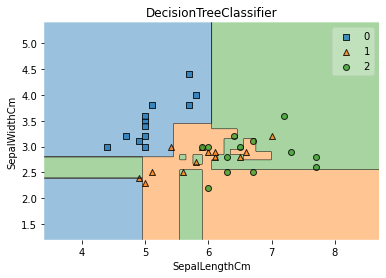

In [6]:
def show_decision_region(x, y, clf):
    plot_decision_regions(x, y, clf=clf)
    plt.xlabel("SepalLengthCm")
    plt.ylabel("SepalWidthCm")

    plt.title(clf.__class__.__name__)
    plt.show()

show_decision_region(np.array([X_test["SepalLengthCm"].values, X_test["SepalWidthCm"].values]).T, y_test.values.reshape(-1,1).T[0], model)

[Text(0.2870065789473684, 0.9583333333333334, 'SepalLengthCm <= 5.45\ngini = 0.667\nsamples = 112\nvalue = [38, 37, 37]\nclass = setosa'),
 Text(0.10526315789473684, 0.875, 'SepalWidthCm <= 2.8\ngini = 0.145\nsamples = 39\nvalue = [36, 2, 1]\nclass = setosa'),
 Text(0.07894736842105263, 0.7916666666666666, 'SepalLengthCm <= 4.95\ngini = 0.625\nsamples = 4\nvalue = [1, 2, 1]\nclass = versicolor'),
 Text(0.05263157894736842, 0.7083333333333334, 'SepalWidthCm <= 2.4\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]\nclass = setosa'),
 Text(0.02631578947368421, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = setosa'),
 Text(0.07894736842105263, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.10526315789473684, 0.7083333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(0.13157894736842105, 0.7916666666666666, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(0.46875, 0.875, 'SepalLengthCm <= 6.05\n

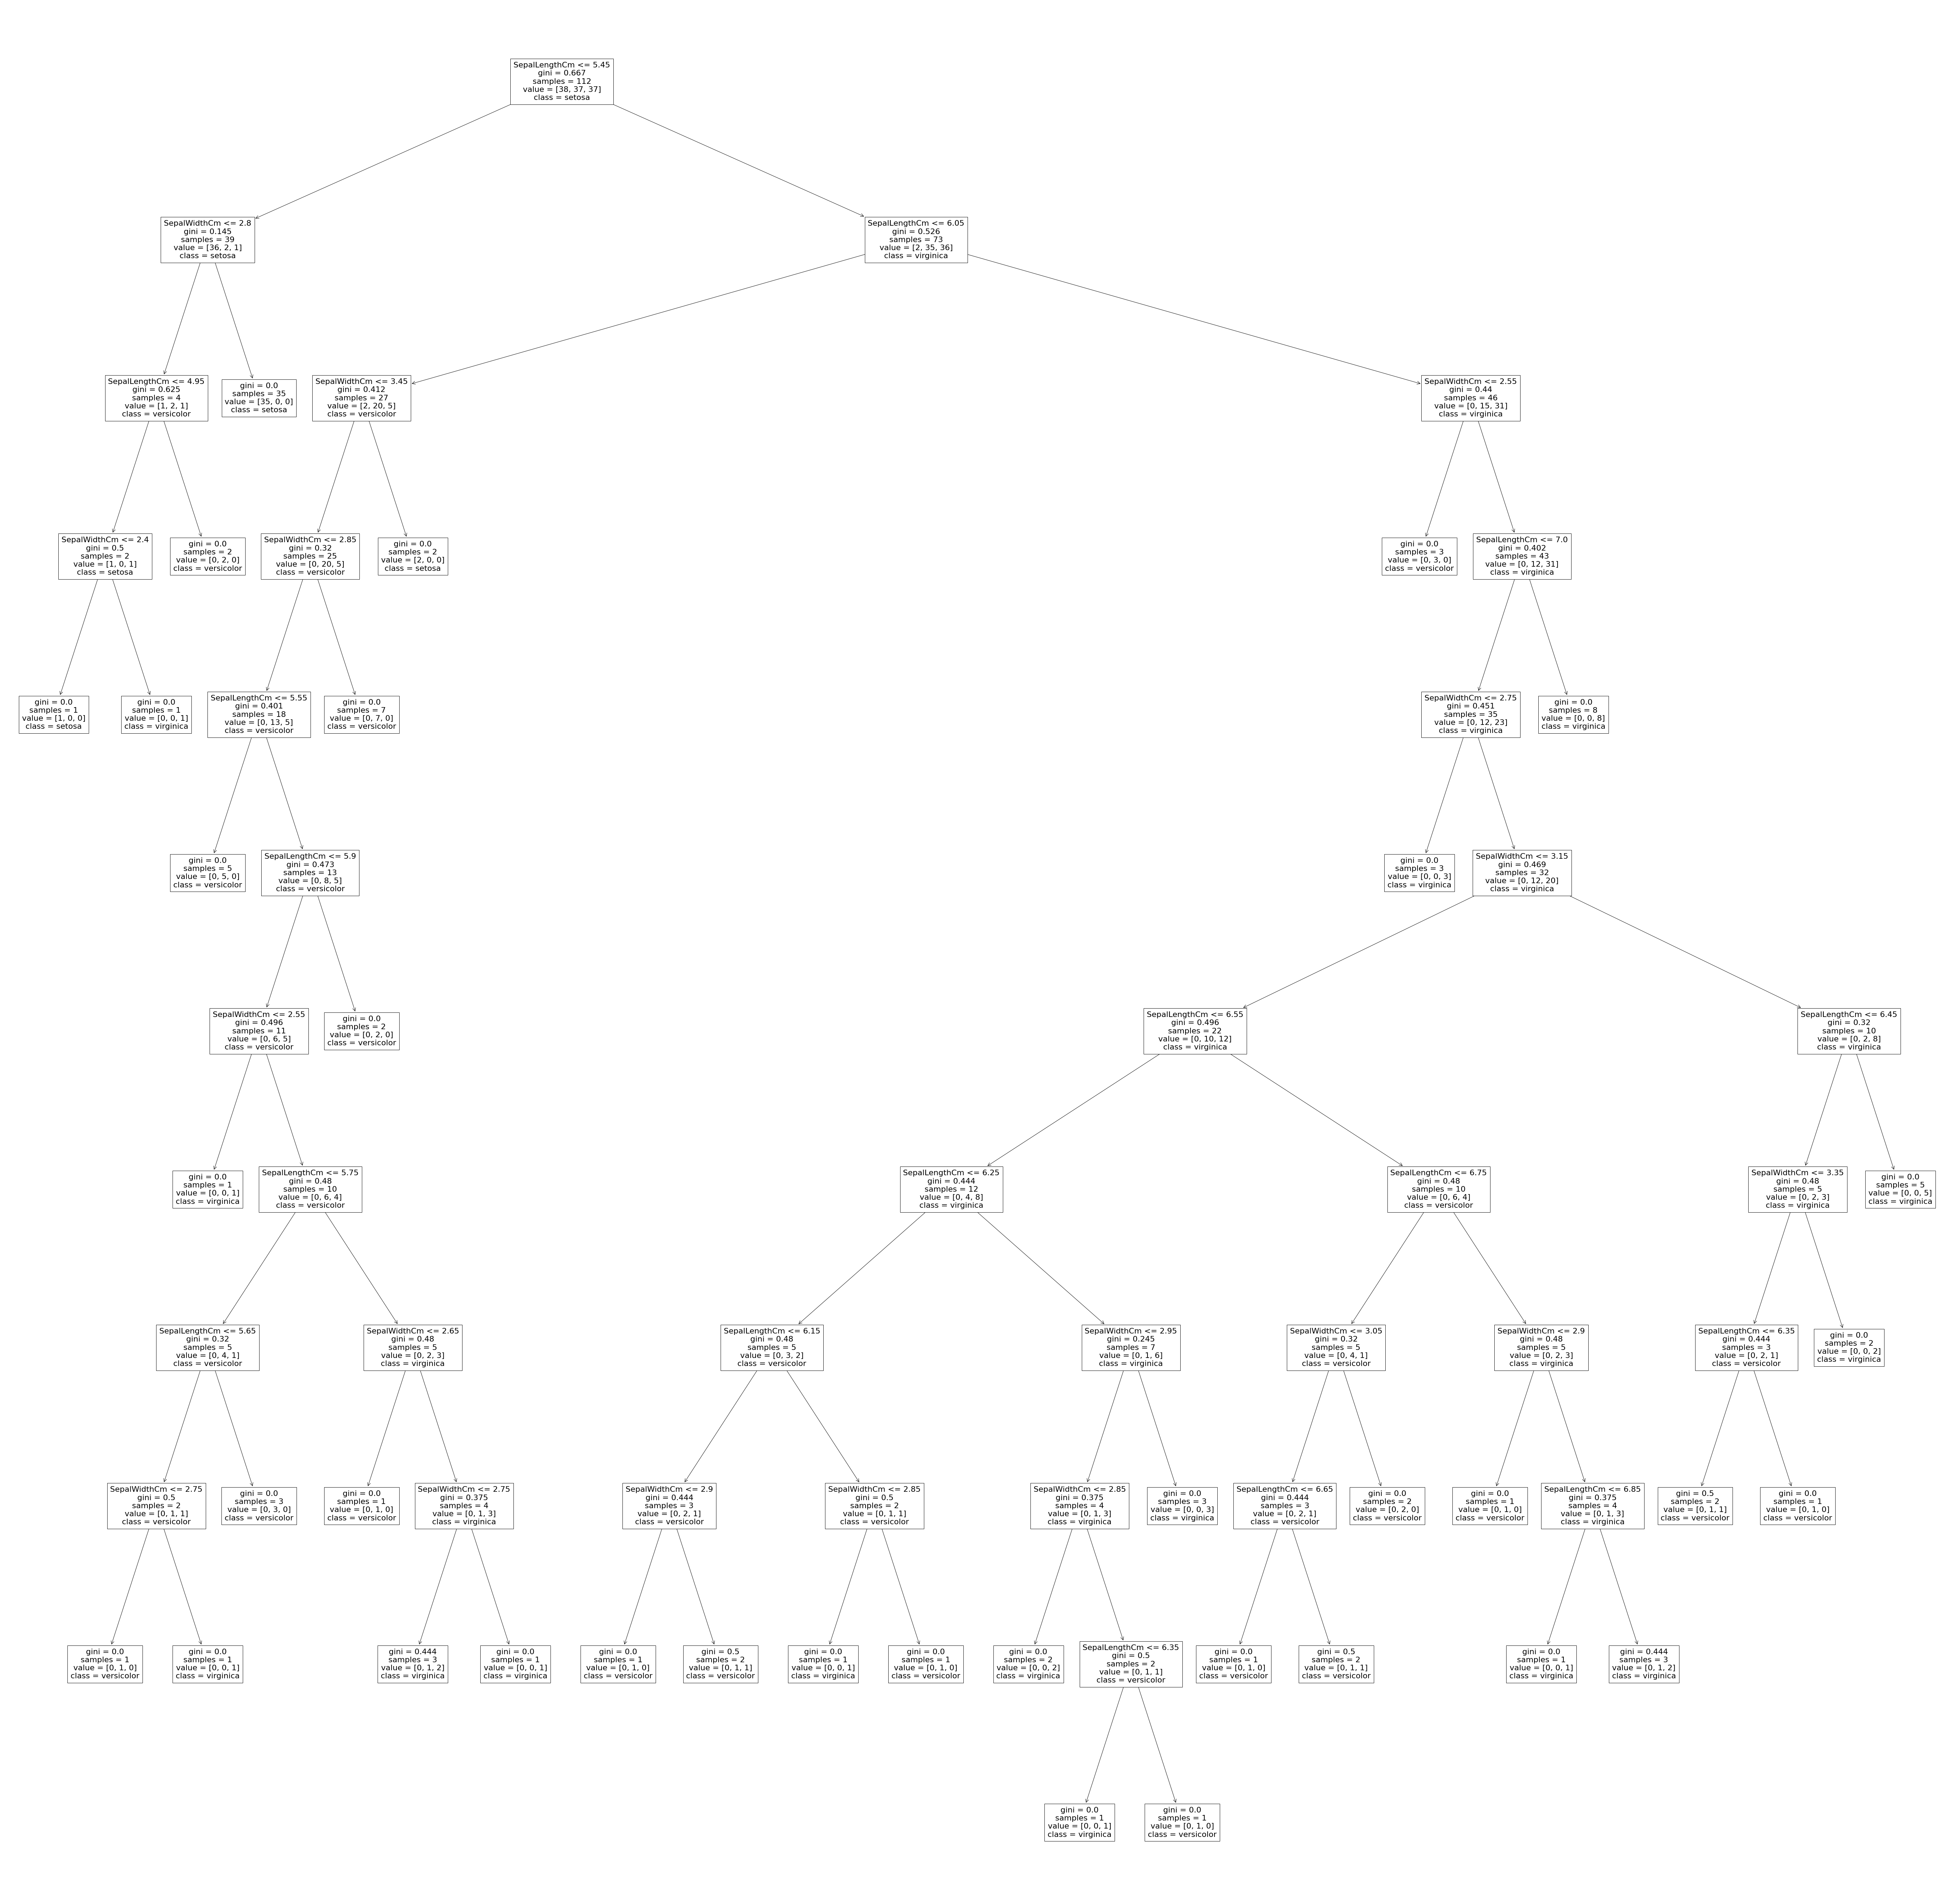

In [7]:
plt.figure(figsize=(100,100))
plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm"], class_names=['setosa', 'versicolor', 'virginica'])

**E com as 4 features?**

In [8]:
#Vamos usar somente duas features SepalLengthCm e SepalWidthCm
X = dataset.iloc[:,0:4]
y = dataset.iloc[:,[4]]

#Separando o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
model = DecisionTreeClassifier()
#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



[Text(0.5, 0.9, 'PetalLengthCm <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [39, 36, 37]\nclass = setosa'),
 Text(0.375, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = setosa'),
 Text(0.625, 0.7, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 73\nvalue = [0, 36, 37]\nclass = virginica'),
 Text(0.5, 0.5, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = versicolor'),
 Text(0.25, 0.3, 'PetalWidthCm <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]\nclass = versicolor'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = versicolor'),
 Text(0.375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.3, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = versicolor'),
 Text(0.75, 0.5, 'gini = 0.0\nsamp

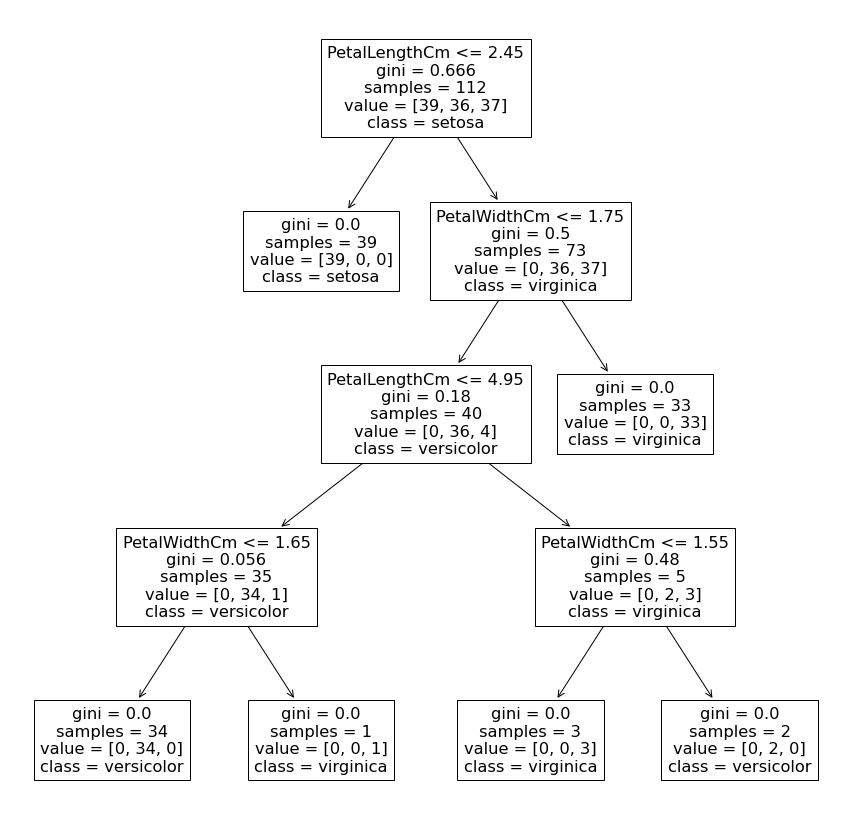

In [10]:
plt.figure(figsize=(15,15))
plot_tree(model, feature_names=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"], class_names=['setosa', 'versicolor', 'virginica'])

**REGRESSÃO**

In [11]:
dataset_R = pd.read_csv('https://raw.githubusercontent.com/JusciAvelino/Monitoria-ModelagemPreditivaDescritiva1//main/house.csv')

In [12]:
X = dataset_R.drop([dataset_R.columns[0]], axis = 1)
y = dataset_R[dataset_R.columns[0]]

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [13]:
regression_tree = DecisionTreeRegressor(max_depth=2)
regression_tree.fit(X_train, y_train)

y_pred = regression_tree.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2_score:", r2_score(y_test, y_pred))

MSE: 2196901743.5060534
R2_score: 0.23727448878701252


Text(0.5, 1.0, 'True x Predicted')

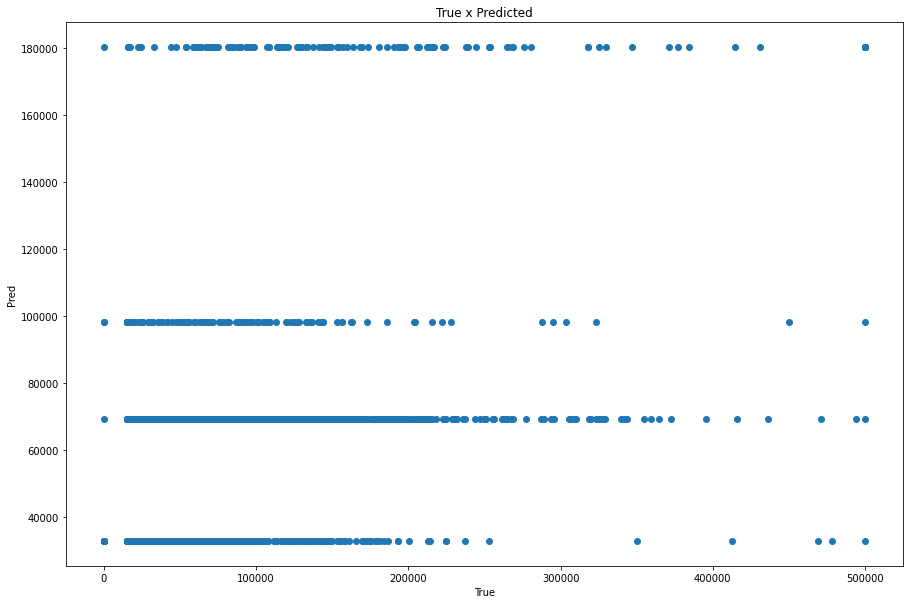

In [14]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("True")
plt.ylabel("Pred")
plt.title("True x Predicted")

[Text(0.5, 0.8333333333333334, 'X[13] <= 0.091\nsquared_error = 2762848755.735\nsamples = 17088\nvalue = 49900.186'),
 Text(0.25, 0.5, 'X[12] <= 0.993\nsquared_error = 13056755547.349\nsamples = 740\nvalue = 139662.031'),
 Text(0.125, 0.16666666666666666, 'squared_error = 16253742010.718\nsamples = 373\nvalue = 180390.676'),
 Text(0.375, 0.16666666666666666, 'squared_error = 6408054791.094\nsamples = 367\nvalue = 98267.523'),
 Text(0.75, 0.5, 'X[0] <= 2496.0\nsquared_error = 1915668796.066\nsamples = 16348\nvalue = 45837.074'),
 Text(0.625, 0.16666666666666666, 'squared_error = 872184592.802\nsamples = 10483\nvalue = 32792.516'),
 Text(0.875, 0.16666666666666666, 'squared_error = 2933014593.542\nsamples = 5865\nvalue = 69152.691')]

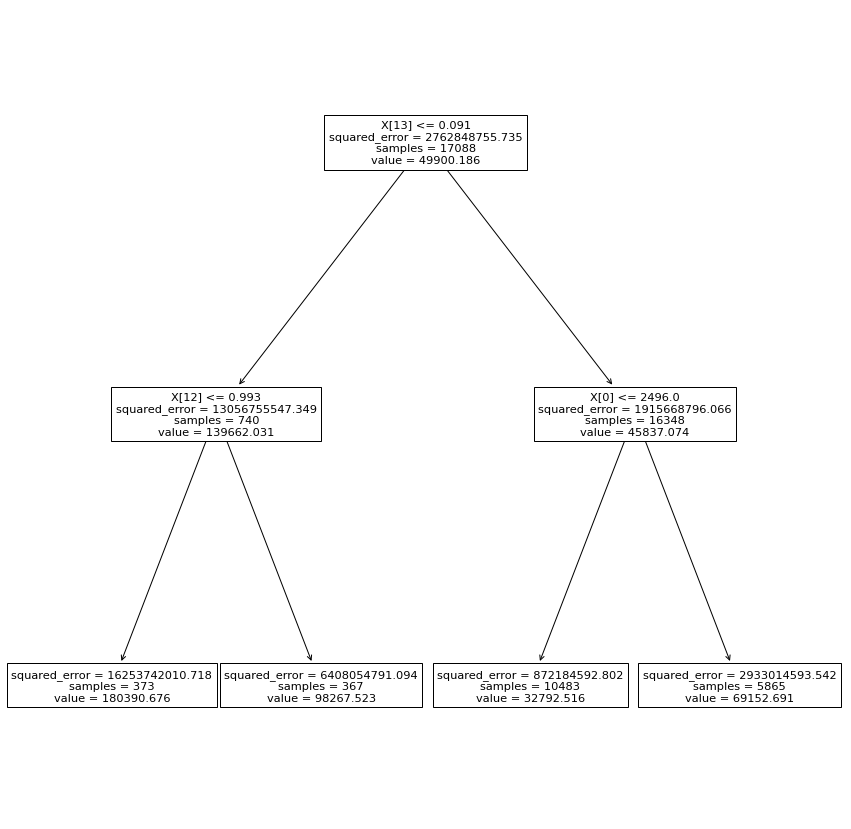

In [15]:
plt.figure(figsize=(15,15))
plot_tree(regression_tree)